In [1]:
from numpy import *
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import TSNE

In [2]:
#计算欧式距离
def euclDistance(v1, v2):
    return sqrt(sum(power(v2 - v1, 2)))

In [3]:
#选择聚簇中心
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape  #返回矩阵的行和列
    centroids = zeros((k, dim))  #centroids存储每个簇心的坐标
    for i in range(k):
        index = int(random.uniform(0, numSamples))
        centroids[i, :] = dataSet[index, :]
    return centroids

In [4]:
'''
1）从N个文档随机选取K个文档作为质心
2）对剩余的每个文档测量其到每个质心的距离，并把它归到最近的质心的类
3）重新计算已经得到的各个类的质心
4）迭代2～3步直至新的质心与原质心相等或小于指定阈值，算法结束
'''

'\n1）从N个文档随机选取K个文档作为质心\n2）对剩余的每个文档测量其到每个质心的距离，并把它归到最近的质心的类\n3）重新计算已经得到的各个类的质心\n4）迭代2～3步直至新的质心与原质心相等或小于指定阈值，算法结束\n'

In [5]:
def kmeans(dataSet, k): 
    numSamples = dataSet.shape[0]
    # clusterAssment第一列存储对应样本点属于哪一个簇,第二列是该点到簇中心的距离平方和                  
    clusterAssment = mat(zeros((numSamples, 2)))
    clusterChanged = True

    # 找出初始点
    centroids = initCentroids(dataSet, k)
    while clusterChanged:
        # clusterChanged标记簇中心是否改变
        clusterChanged = False

        # 对于每个样本点,计算它与每个簇之间的距离,距离最小划分为它归属的簇
        for i in range(numSamples):
            minDist = inf  
            #inf是numpy中的一个常量,表示无穷大
            minIndex = 0

            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :])
                if distance < minDist:
                    minDist = distance
                    minIndex = j

            # 判断该样本点所属的簇是否改变,若改变记下它与簇中心之间的距离
            if clusterAssment[i,
                              0] != minIndex:  #clusterAssment[i, 0]是原先该样本所属的簇中心,minIndex是新样本点所属的簇中心
                clusterChanged = True  #簇中心已发生改变
                clusterAssment[i, :] = minIndex, minDist**2

        # 更新簇中心
        for j in range(k):
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[
                0]]  #clusterAssment[:,0].A将clusterAssment[:,0]矩阵转换成数组
            # nonzero(a)函数将对矩阵a的所有非零元素,分别从两个维度(行和列)看,非0元素对应的行坐标放在一个列表中,对应的列坐标放在一个列表中,然后一起返回!
            # clusterAssment[:, 0].A ==j将对应的元素编程True和False了,所以nonzero(clusterAssment[:, 0].A == j)[0]最终将该簇的点
            centroids[j, :] = mean(
                pointsInCluster, axis=0)  #选项axis=0表示沿矩阵的列方向进行均值计算

    print('Congratulations, cluster complete!')
    return centroids, clusterAssment

In [6]:
def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    if dim != 2:
        print(
            "Sorry! I can not draw because the dimension of your data is not 2!"
        )
        return 1

    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Sorry! Your k is too large!")
        return 1

    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)
    plt.show()

In [7]:
train_num = 5000
print("load data...")
mnist = input_data.read_data_sets('../../data/', one_hot=True)
train_images = mnist.train.images
dataMat = TSNE().fit_transform(train_images[:train_num])

load data...
Extracting ../../data/train-images-idx3-ubyte.gz
Extracting ../../data/train-labels-idx1-ubyte.gz
Extracting ../../data/t10k-images-idx3-ubyte.gz
Extracting ../../data/t10k-labels-idx1-ubyte.gz


clustering...
Congratulations, cluster complete!
[[ 10.1611681  -49.41313553]
 [  1.34739637  -0.80352056]
 [-55.04549408   8.68046951]
 [ 66.72697449   6.37891436]
 [-20.08272171 -26.72959518]
 [ 41.47779083  13.13488388]
 [-27.67796707  44.97389984]
 [ 13.60941315  45.94640732]
 [-59.82429123 -33.73008728]
 [ 43.39649963 -22.78181839]]
[[   3.          576.74970797]
 [   4.           80.04014704]
 [   9.          206.20705088]
 ..., 
 [   2.          190.71651315]
 [   9.          236.36835273]
 [   3.           30.74218528]]
show the result...


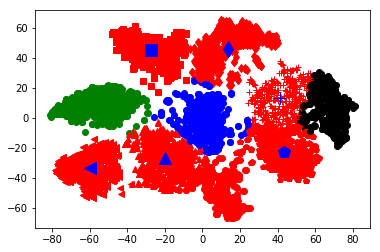

In [8]:
print("clustering...")
k = 10
centroids, clusterAssment = kmeans(dataMat, k)
print(centroids)
print(clusterAssment)

print("show the result...")
showCluster(dataMat, k, centroids, clusterAssment)